In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn

In [2]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
   
df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


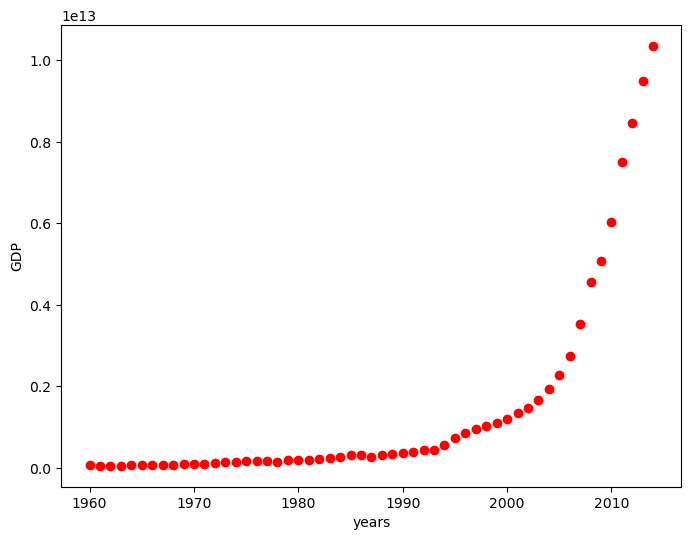

In [4]:
plt.figure(figsize=(8, 6))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.xlabel("years")
plt.ylabel("GDP")
plt.show()

In [6]:
X = np.asanyarray(df[['Year']]/df['Year'].max())
y = np.asanyarray(df[['Value']]/df['Value'].max())

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
yhat = model.predict(X)

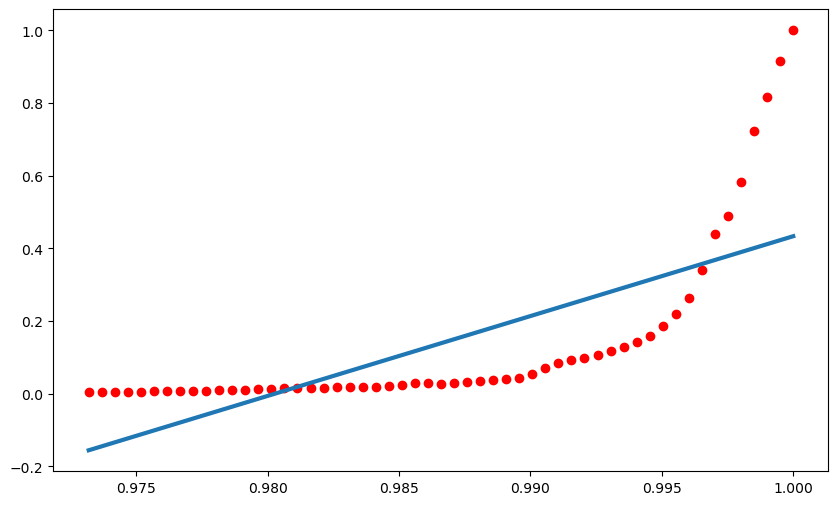

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X, yhat, linewidth=3.0, label='fit')
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MEA = mean_absolute_error(y, yhat)
RMSE = np.sqrt(mean_squared_error(y, yhat))
print("MEA=", MEA)
print("RMSE=", RMSE)

MEA= 0.12657979406214762
RMSE= 0.1650608155199123


In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [15]:
model.fit(X_poly, y)

LinearRegression()

In [16]:
yhat = model.predict(X_poly)

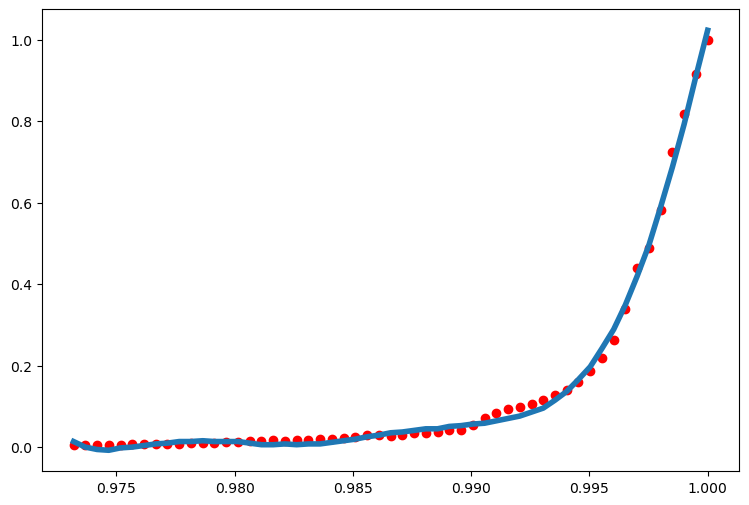

In [17]:
plt.figure(figsize=(9, 6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X, yhat, linewidth=4.0, label='fit')
plt.show()

In [18]:
MEA1 = mean_absolute_error(y, yhat)
RMSE1 = np.sqrt(mean_squared_error(y, yhat))
print(f"MEA: {MEA1}")
print(f"RMSE: {RMSE1}")

MEA: 0.01024485469772952
RMSE: 0.012670061052995018


In [19]:
# Logestic regression yordamida  ham model qurishimiz mumkin ekan

In [20]:
x_data, y_data = (df['Year'].values, df['Value'].values)
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [21]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1/(1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

In [22]:
from scipy.optimize import curve_fit # biz curve_fit yordamida machine 
# learning qilishimiz mumkin
beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4517118227653
beta2=0.9972071272524615


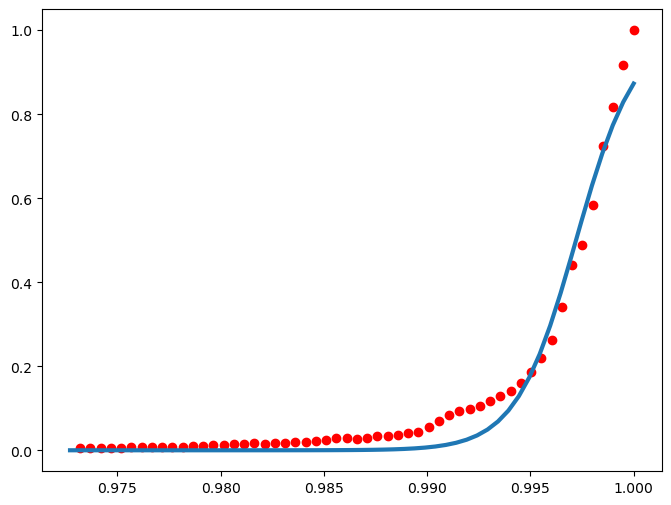

In [23]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8, 6))
yhat=sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, yhat, linewidth=3.0, label='fit')
plt.show()